# Evaluating Classification Models with ROC AUC
The Titanic data frames describe the survival status of individual passengers on the Titanic.

Source the data from the Kaggle repository here: https://www.kaggle.com/c/titanic/data

Execute the tasks listed below:

* Train 2 classifiers of your choice to, respectively, predict the survival chance of individuals in the dataset and cluster the most "similar" individuals. NB: Apply the required steps up to the model training phase.
* Evaluate the performance of the 2 models using the ROC AUC approach
* Plot the ROC curves using MatPlotLib
* Say which model performed better

In [1]:
# 1. library import
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve

# 2. Loading Titanic data
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# 3. Pre-treatment
# Encoding categorical variables
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']].dropna()

X = df[features]
y = df['Survived']

# 4. Train/test separation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Model training
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# 6. Predictions
log_preds = log_model.predict(X_val)
log_probas = log_model.predict_proba(X_val)[:, 1]

rf_preds = rf_model.predict(X_val)
rf_probas = rf_model.predict_proba(X_val)[:, 1]

#7. Evaluate the performance of the 2 models using the ROC AUC approach
log_auc = roc_auc_score(y_val, log_probas)
rf_auc = roc_auc_score(y_val, rf_probas)

print(f"Logistic Regression ROC AUC: {log_auc:.4f}")
print(f"Random Forest ROC AUC: {rf_auc:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression ROC AUC: 0.8152
Random Forest ROC AUC: 0.8239


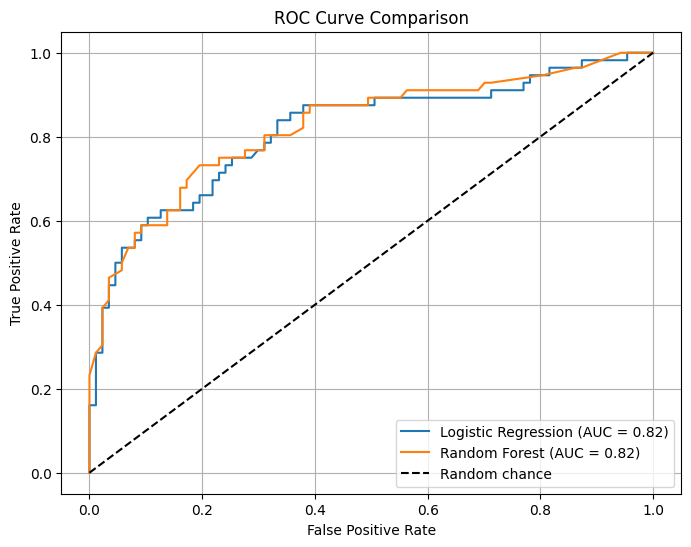

In [2]:
#8. Plot the ROC curves using MatPlotLib
log_fpr, log_tpr, _ = roc_curve(y_val, log_probas)
rf_fpr, rf_tpr, _ = roc_curve(y_val, rf_probas)

plt.figure(figsize=(8, 6))
plt.plot(log_fpr, log_tpr, label=f'Logistic Regression (AUC = {log_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()


In [3]:
#9. Analyse
if log_auc > rf_auc:
    print("La régression logistique a mieux performé selon le score ROC AUC.")
else:
    print("Le modèle Random Forest a mieux performé selon le score ROC AUC.")


Le modèle Random Forest a mieux performé selon le score ROC AUC.
